<a href="https://colab.research.google.com/github/J-Vinasco/missions/blob/main/MISI%C3%93N_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MISIÓN 2: Predicción de éxito de películas en el cine con Técnicas de Regresión**

1. Introducción al Aprendizaje Automático y Dataset de Películas

El aprendizaje supervisado se ha utilizado en la industria cinematográfica para predecir el rendimiento de las películas, analizar tendencias y optimizar decisiones de producción y marketing. Algunas de las aplicaciones más comunes incluyen la predicción de ingresos en taquilla, la evaluación de la recepción crítica, el análisis de la audiencia objetivo, y la recomendación de contenidos. A través de modelos de regresión o clasificación, los estudios cinematográficos pueden prever el éxito comercial de una película antes de su estreno, lo que les permite tomar decisiones informadas sobre presupuestos, campañas publicitarias y estrategias de distribución.

En cuanto a las variables relevantes de un dataset relacionado con ingresos y éxito cinematográfico, algunas de las más importantes podrían incluir: el presupuesto de la película, que puede influir directamente en su calidad de producción y su potencial de taquilla; el género de la película, que afecta a su audiencia y las expectativas de éxito en mercados específicos; el número de actores principales conocidos, ya que las estrellas de cine pueden atraer más espectadores; la calificación de los críticos o las opiniones en plataformas de reseñas, que pueden influir en la percepción del público; y la estrategia de marketing (por ejemplo, cantidad de promoción y distribución). Estas variables afectan directamente la forma en que se percibe la película y su probabilidad de generar ingresos altos, lo que impacta las predicciones del éxito.

Las variables más improtantes que vamos a analizar para la regresión lineal sobre la recaudación (Gross) de la película son:
Budget (Presupuesto),  Puntuación (IMDB) y duración

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
# 1. Carga del Dataset: https://github.com/davidriveraarbelaez/IA_Explorador/blob/main/Datasets/movie_metadata.csv
# Cargar el dataset proporcionado sobre películas en un DataFrame de pandas.
dataset = pd.read_csv ('/content/movie_metadata.csv')

In [ ]:
# 2. Revisión General de los Datos:

# Imprimir las primeras 10 filas del dataset.
dataset.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,0.0$,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0$,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0$,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0$,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0$,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0$,2009.0,11000.0,7.5,2.35,10000


In [ ]:
# Usar .info() y .describe() para entender mejor la estructura y las estadísticas básicas.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
# 3. Búsqueda y Eliminación de Duplicados:

# Verificar si hay filas duplicadas en el dataset utilizando el método .duplicated().

duplicados = dataset.duplicated().sum()
print(f'Duplicados encontrados:{duplicados}')

Duplicados encontrados:45


In [ ]:
# Si se encuentran duplicados, toca eliminarlos con .drop_duplicates() y verificar cuántos duplicados fueron eliminados.
dataset.drop_duplicates(inplace=True)
duplicados2 = dataset.duplicated().sum()
print(f'Duplicados eliminados. Filas restantes {dataset.shape[0]}')

Duplicados eliminados. Filas restantes 4998


In [ ]:
# Borrar columnas innecesarias
dataset.drop (['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
              'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
              'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link','language',
              'country', 'content_rating'], axis=1, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 5042
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   4949 non-null   float64
 1   duration                 4983 non-null   float64
 2   director_facebook_likes  4895 non-null   float64
 3   actor_3_facebook_likes   4975 non-null   float64
 4   actor_1_facebook_likes   4991 non-null   float64
 5   gross                    4124 non-null   float64
 6   num_user_for_reviews     4977 non-null   float64
 7   budget                   4998 non-null   object 
 8   title_year               4891 non-null   float64
 9   actor_2_facebook_likes   4985 non-null   float64
 10  imdb_score               4998 non-null   float64
 11  aspect_ratio             4671 non-null   float64
 12  movie_facebook_likes     4998 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 546.7+ KB


In [ ]:
#volver columna a float
dataset['movie_facebook_likes'] = dataset['movie_facebook_likes'].astype(float)

In [ ]:
#borrar filas con datos faltantes
dataset.dropna(inplace=True)

In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4005 entries, 0 to 5042
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   4005 non-null   float64
 1   duration                 4005 non-null   float64
 2   director_facebook_likes  4005 non-null   float64
 3   actor_3_facebook_likes   4005 non-null   float64
 4   actor_1_facebook_likes   4005 non-null   float64
 5   gross                    4005 non-null   float64
 6   num_user_for_reviews     4005 non-null   float64
 7   budget                   4005 non-null   object 
 8   title_year               4005 non-null   float64
 9   actor_2_facebook_likes   4005 non-null   float64
 10  imdb_score               4005 non-null   float64
 11  aspect_ratio             4005 non-null   float64
 12  movie_facebook_likes     4005 non-null   float64
dtypes: float64(12), object(1)
memory usage: 438.0+ KB


In [ ]:
# 4. Identificación de Valores Nulos:

# Identificar qué columnas tienen valores nulos y cuántos valores nulos hay en cada columna.
dataset.isnull().sum()

,0
num_critic_for_reviews,0
duration,0
director_facebook_likes,0
actor_3_facebook_likes,0
actor_1_facebook_likes,0
gross,0
num_user_for_reviews,0
budget,0
title_year,0
actor_2_facebook_likes,0


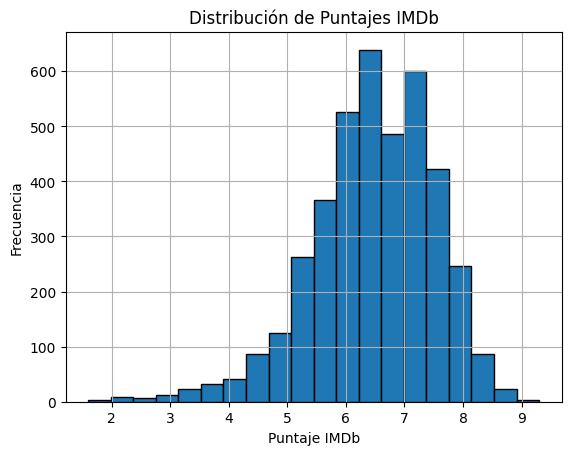

In [ ]:
# 5. Visualización de Variables:

# Histograma que muestre la distribución de la variable imdb_score.
plt.hist(dataset['imdb_score'], bins=20, edgecolor='black')
plt.title('Distribución de Puntajes IMDb')
plt.xlabel('Puntaje IMDb')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:
# 6. Análisis de Correlaciones:
# Revisar qué tipo de datos tienen las columnas budget, gross y imdb_score.
dataset[['budget', 'imdb_score', 'duration','gross']].dtypes

,0
budget,object
imdb_score,float64
duration,float64
gross,float64


In [ ]:
# Se cambian los tipos de datos de 'bugdet' de object a float
dataset['budget'] = dataset['budget'].str.replace('$', '').str.replace(',', '').astype(float)

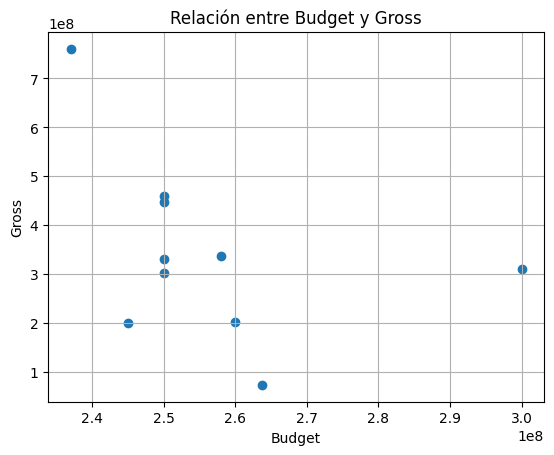

In [ ]:
# 7. Gráficos de Dispersión:

# Gráfico de dispersión para analizar la relación entre gross y budget.
plt.scatter (dataset['budget'].head(10), dataset['gross'].head(10))
plt.title('Relación entre Budget y Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.grid(True)
plt.show()


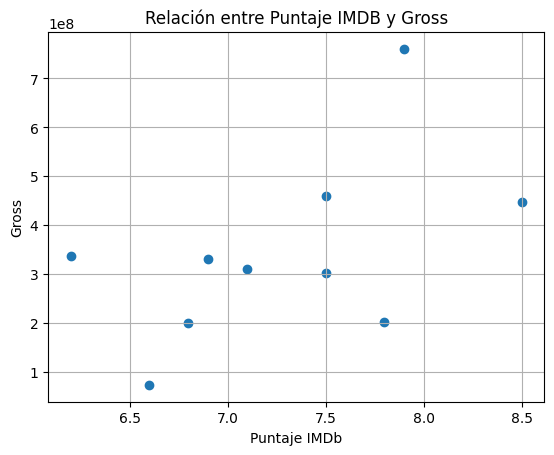

In [ ]:
# Gráfico de dispersión entre imdb_score y gross.
plt.scatter (dataset['imdb_score'].head(10), dataset['gross'].head(10))
plt.title('Relación entre Puntaje IMDB y Gross')
plt.xlabel('Puntaje IMDb')
plt.grid(True)
plt.ylabel('Gross')
plt.show()


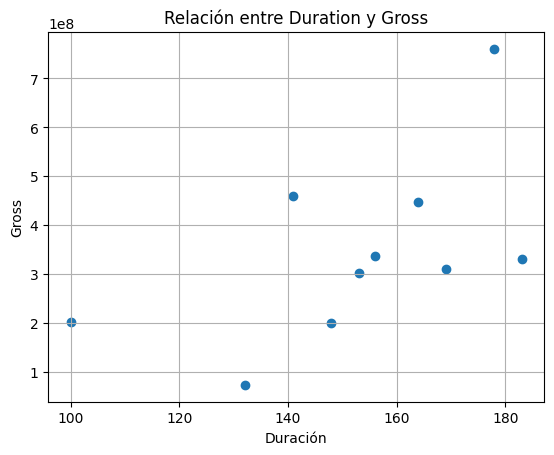

In [53]:
# Gráfico de dispersión entre duración y gross.
plt.scatter (dataset['duration'].head(10), dataset['gross'].head(10))
plt.title('Relación entre Duration y Gross')
plt.xlabel('Duración')
plt.grid(True)
plt.ylabel('Gross')
plt.show()

In [54]:
# Descargar un nuevo archivo limpio
dataset.to_csv('movies_clean.csv', index=False)

2. Regresión Lineal para la Predicción de Ingresos Brutos

In [55]:
dataset2 = pd.read_csv('/content/movies_clean.csv')
dataset2.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4.005000e+03,4005.000000,4.005000e+03,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000
mean,162.480400,109.817228,769.463421,730.945318,7460.668165,4.967091e+07,319.920350,4.322258e+07,2003.165793,1917.412235,6.473833,2.106467,8909.266167
std,122.146454,22.430046,2994.030555,1807.518047,15196.209493,6.849182e+07,402.136047,2.191421e+08,9.928137,4405.297297,1.047093,0.349833,21007.433091
min,1.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,1.000000,0.000000e+00,1920.000000,0.000000,1.600000,1.180000,0.000000
25%,74.000000,95.000000,10.000000,178.000000,721.000000,6.173485e+06,100.000000,8.000000e+06,1999.000000,359.000000,5.900000,1.850000,0.000000
50%,133.000000,106.000000,58.000000,423.000000,1000.000000,2.661659e+07,197.000000,2.200000e+07,2005.000000,658.000000,6.600000,2.350000,196.000000
75%,219.000000,120.000000,226.000000,681.000000,12000.000000,6.414984e+07,380.000000,5.000000e+07,2010.000000,967.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


In [56]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   4005 non-null   float64
 1   duration                 4005 non-null   float64
 2   director_facebook_likes  4005 non-null   float64
 3   actor_3_facebook_likes   4005 non-null   float64
 4   actor_1_facebook_likes   4005 non-null   float64
 5   gross                    4005 non-null   float64
 6   num_user_for_reviews     4005 non-null   float64
 7   budget                   4005 non-null   float64
 8   title_year               4005 non-null   float64
 9   actor_2_facebook_likes   4005 non-null   float64
 10  imdb_score               4005 non-null   float64
 11  aspect_ratio             4005 non-null   float64
 12  movie_facebook_likes     4005 non-null   float64
dtypes: float64(13)
memory usage: 406.9 KB


In [57]:
# Correlación de las variables con Gross

correlationm = dataset2.corr()
grosscorr = correlationm['gross'].sort_values(ascending=False)
print(grosscorr)

gross                      1.000000
num_user_for_reviews       0.555176
num_critic_for_reviews     0.469084
movie_facebook_likes       0.365805
actor_3_facebook_likes     0.286997
actor_2_facebook_likes     0.250320
duration                   0.247532
imdb_score                 0.200691
actor_1_facebook_likes     0.149399
director_facebook_likes    0.142879
budget                     0.104852
aspect_ratio               0.070013
title_year                 0.037291
Name: gross, dtype: float64


In [58]:
# Calcula y muestra la correlación de las variables destacadas
correlacion = dataset2[['num_user_for_reviews', 'movie_facebook_likes','num_critic_for_reviews','gross']].corr()

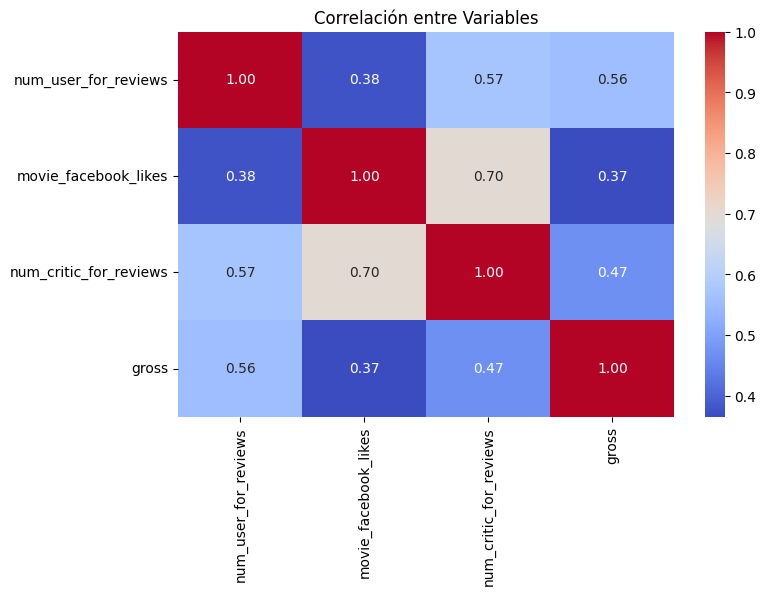

In [59]:
# Mapa de calor para visualizar las correlaciones.
plt.figure(figsize=(8, 5))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Variables')
plt.show()

In [60]:
# Se calcula y muestra la correlación entre las principales variables budget, gross y imdb_score.
correlacion = dataset[['budget', 'gross', 'duration','imdb_score']].corr()
correlacion

,budget,gross,duration,imdb_score
budget,1.000000,0.104852,0.070399,0.027450
gross,0.104852,1.000000,0.247532,0.200691
duration,0.070399,0.247532,1.000000,0.361662
imdb_score,0.027450,0.200691,0.361662,1.000000


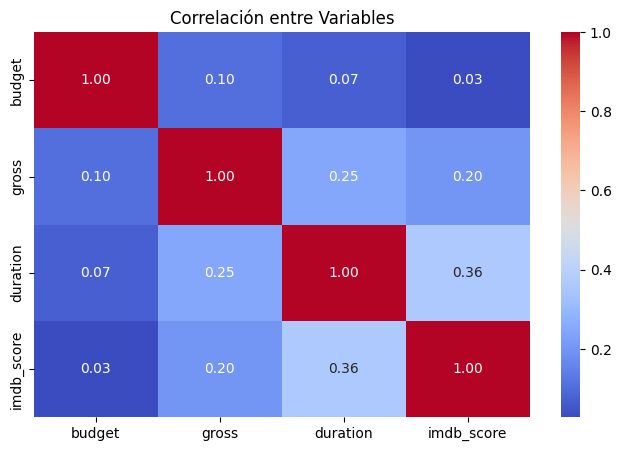

In [61]:
# Mapa de calor para visualizar las correlaciones.
plt.figure(figsize=(8, 5))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Variables')
plt.show()

Gráfico de dispersión

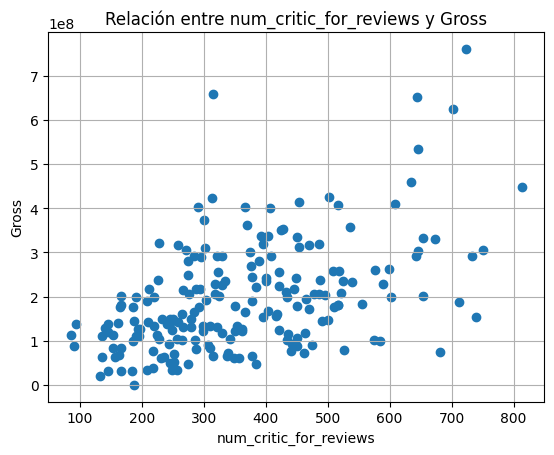

In [62]:
# Gráfico de dispersión para analizar la relación entre num_critic_for_reviews y gross.
plt.scatter (dataset2['num_critic_for_reviews'].head(200), dataset2['gross'].head(200))
plt.title('Relación entre num_critic_for_reviews y Gross')
plt.xlabel('num_critic_for_reviews')
plt.ylabel('Gross')
plt.grid(True)
plt.show()

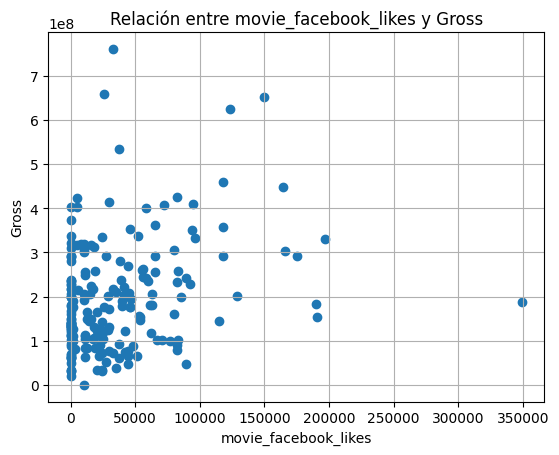

In [63]:
# Crea un gráfico de dispersión para analizar la relación entre  y gross.
plt.scatter (dataset2['movie_facebook_likes'].head(200), dataset2['gross'].head(200))
plt.title('Relación entre movie_facebook_likes y Gross')
plt.xlabel('movie_facebook_likes')
plt.ylabel('Gross')
plt.grid(True)
plt.show()

In [78]:
# El modelo aprende patrones de los datos proporcionados para predecir la recaudación
# Definir características (X) y etiqueta (y) (datos destacados anteriormente), diviendo el conjunto de datos en entrenamiento y prueba

X = dataset2[['budget', 'duration', 'imdb_score','num_user_for_reviews', 'movie_facebook_likes','num_critic_for_reviews']]
y = dataset2['gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Inicializar y entrenar el modelo de árbol de decisión para realizar predicciones

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Interpretación de estos errores

"""
 MAE de 37 millones no es tan malo,
 considerando que los valores de gross son del orden de 200 a 760 millones.
 El error representa aproximadamente el 5% de la recaudación, lo cual es razonable.

 el R² es 0.31, lo que sugiere que el modelo explica el 28% de la variabilidad en los ingresos brutos (gross)
 en función de las características proporcionadas

"""
# Imprimir los resultados
print("Error Absoluto Medio (MAE):", mae)
print("Error Cuadrático Medio (MSE):", mse)
print("R² Score:", r2)


Error Absoluto Medio (MAE): 37731772.026281655
Error Cuadrático Medio (MSE): 3425629090569029.5
R² Score: 0.3166583075592666


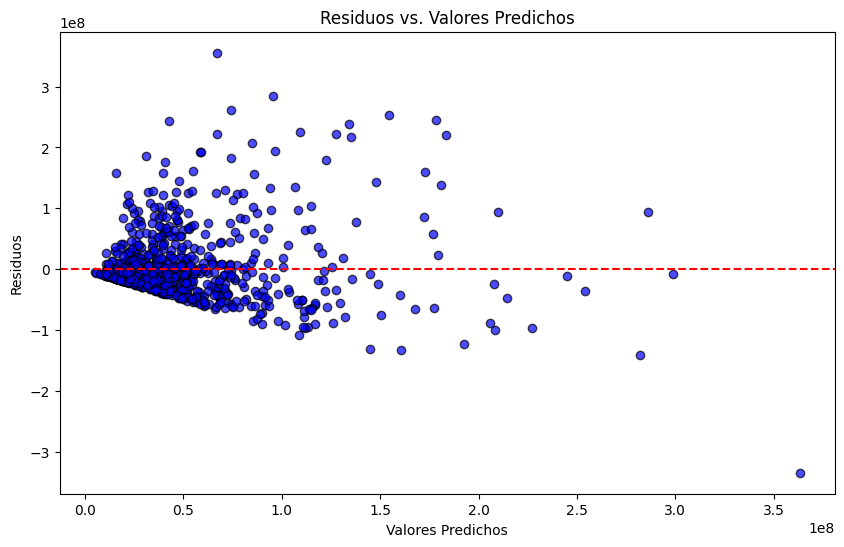

In [65]:
# Calcular los residuos (diferencia entre valores reales y predichos)
residuos = y_test - y_pred

# 1. Gráfico de residuos vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, color='blue', edgecolors='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs. Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')



"""
Con este gráfico se analiza si se cumple homoscedasticidad, se observan muchos valores juntos
y algunosos separados que sugieren una varianza mayor,
por lo que no se cumpliría homoscedasticidad para valores predichos más grandes

"""
plt.show()

In [66]:
# 2. Verificar Independencia de los Errores
"""
Calculamos el estadístico de Durbin-Watson para verificar la independencia de
los errores. Un valor cercano a 2 indica independencia.
"""

dw_stat = sm.stats.durbin_watson(residuos)
print("Durbin-Watson:", dw_stat)
# Interpretación:
# - Valor cercano a 2 indica independencia.
# - Valor cercano a 0 sugiere autocorrelación positiva.
# - Valor cercano a 4 sugiere autocorrelación negativa.

Durbin-Watson: 1.9723976584160545


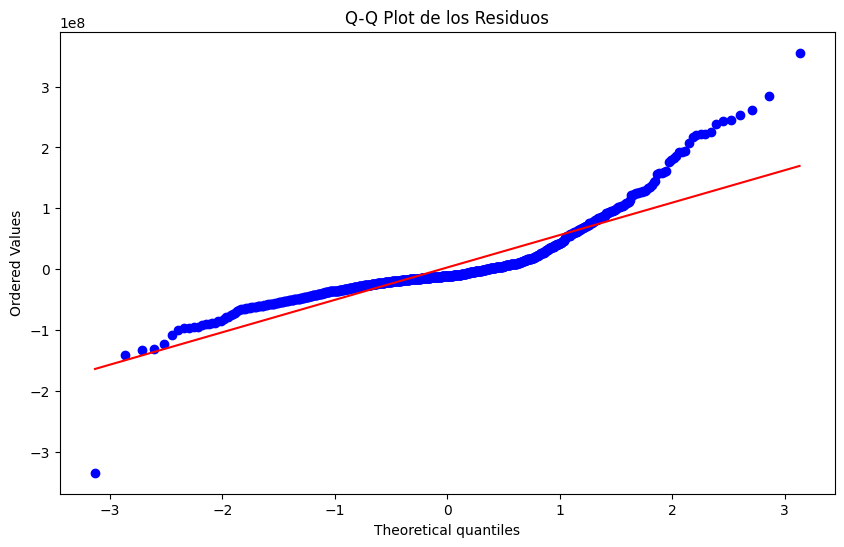

In [67]:
# 2. Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot de los Residuos')

"""
Se comparan los cuantiles teóricos de una distribución normal con los cuantiles de los residuos del modelo
los residuos se alinean bastante bien con la línea roja,
lo que indica que los residuos en el centro de la distribución se aproximan a una distribución normal.

"""
plt.show()

In [79]:

# 3. Regresión Logística para Clasificación de Películas

# Definición de éxito
# Calculamos el percentil 75 y creamos la nueva columna 'Exito', donde 1 indica 'exitosa' y 0 indica 'no exitosa'

percentil_75 = dataset2['gross'].quantile(0.75)
dataset2['exito'] = dataset2['gross'].apply(lambda x: 1 if x > percentil_75 else 0)

# Definir variables predictoras y la variable dependiente
X = dataset2[['budget', 'duration', 'imdb_score','num_user_for_reviews', 'movie_facebook_likes','num_critic_for_reviews']]
y = dataset2['exito']

# Agregar una constante al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Resumen de los resultados
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.474505
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  exito   No. Observations:                 4005
Model:                          Logit   Df Residuals:                     3998
Method:                           MLE   Df Model:                            6
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                  0.1561
Time:                        03:20:46   Log-Likelihood:                -1900.4
converged:                       True   LL-Null:                       -2251.9
Covariance Type:            nonrobust   LLR p-value:                1.398e-148
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.8153      0.298     -9.447      0.000      -3.399      

De este procedimiento se pueden analizar variables significativas y no significativas:

Variables significativas: budget, duration, num_user_for_reviews, num_critic_for_reviwes son determinantes para el éxito.

Variables no significativas: Imdb_Score, num_facebook_lives no muestran relevancia estadística, lo cual podría indicar que el éxito depende más de factores internos del producto que de su percepción online.

In [83]:
# Predicción de probabilidades y clasificación
y_pred_prob = result.predict(X)
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Cálculo de las métricas
precision = precision_score(y, y_pred_class)
recall = recall_score(y, y_pred_class)
f1 = f1_score(y, y_pred_class)
accuracy = accuracy_score(y, y_pred_class)
auc = roc_auc_score(y, y_pred_prob)

print(f"Precisión: {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Exactitud (Accuracy): {accuracy:.2f}")
print(f"AUC: {auc:.2f}")

Precisión: 0.69
Sensibilidad (Recall): 0.28
F1 Score: 0.40
Exactitud (Accuracy): 0.79
AUC: 0.77


El modelo muestra un desempeño aceptable en precisión y exactitud, indicando que identifica correctamente una buena proporción de las películas clasificadas como exitosas y que su capacidad general es razonable. Sin embargo, la sensibilidad es baja, lo que implica que muchas películas exitosas no son reconocidas como tales

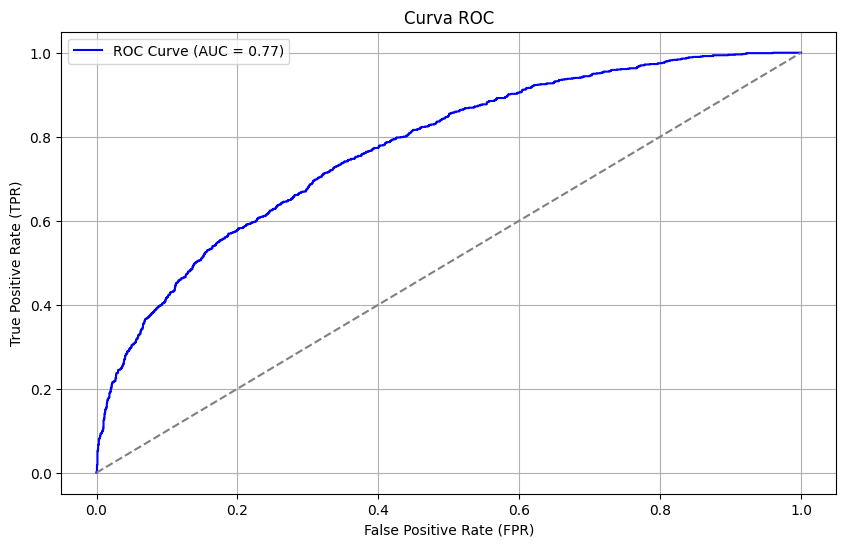

In [82]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Línea diagonal
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
"""
4. Afinamiento y Evaluación Avanzada de Modelos
4.1 Validación cruzada
Implementa validación cruzada para el modelo de regresión lineal y el modelo de regresión logística. Explica cómo mejora la generalización de los modelos.
4.2 Identificación de sobreajuste y subajuste
Analiza los resultados de los modelos para determinar si presentan sobreajuste o subajuste. Propón estrategias para abordar estos problemas.
4.3 Ajuste de hiperparámetros
Ajusta los hiperparámetros del modelo de regresión logística (como el umbral de clasificación) para mejorar su rendimiento.
"""

In [ ]:
"""
5. Extensión: K-Means para Segmentación de Películas
5.1 Agrupamiento de películas
Utiliza el algoritmo de K-Means para agrupar películas en función de variables como presupuesto, likes en Facebook de actores principales y número de críticas.
Determina el número óptimo de clusters usando el método del codo y analiza los resultados.
5.2 Interpretación de los clusters
Describe las características principales de cada cluster identificado y cómo podrían usarse en estrategias de marketing cinematográfico.

"""